In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import thinkstats2
import thinkplot

In [2]:
games = pd.read_csv('games.csv')

In [3]:
games.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


The first thing I did with the data set was check if there was any N/A values.

In [4]:
games.isnull().sum()

id                0
rated             0
created_at        0
last_move_at      0
turns             0
victory_status    0
winner            0
increment_code    0
white_id          0
white_rating      0
black_id          0
black_rating      0
moves             0
opening_eco       0
opening_name      0
opening_ply       0
dtype: int64

I also created a column for the difference betwee the two players ratings. 

In [5]:
games = games.assign(RatingDifference = games['white_rating'] - games['black_rating'])

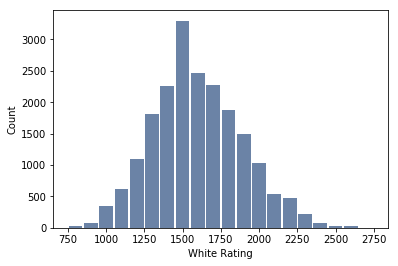

In [6]:
hist = thinkstats2.Hist(games.white_rating.round(-2))
thinkplot.Hist(hist,width = 90)
thinkplot.Config(xlabel='White Rating', ylabel='Count')

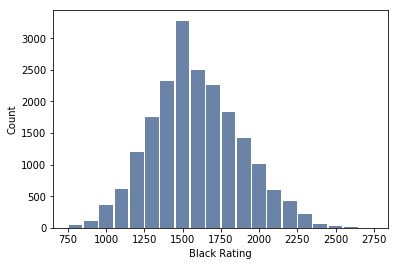

In [7]:
hist = thinkstats2.Hist(games.black_rating.round(-2))
thinkplot.Hist(hist,width = 90)
thinkplot.Config(xlabel='Black Rating', ylabel='Count')


I learned at this point that lichess, which is the site I got this data from, starts every new player at 1500 rating. This means that almost every player at 1500 is basically an unknow rating. For this reason I removed games with players at 1500.

In [8]:
games = games[games['white_rating'] != 1500]
games = games[games['black_rating'] != 1500]

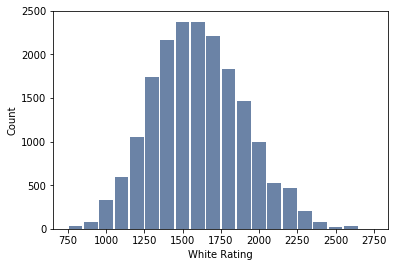

In [9]:
hist = thinkstats2.Hist(games.white_rating.round(-2))
thinkplot.Hist(hist,width = 90)
thinkplot.Config(xlabel='White Rating', ylabel='Count')

In [10]:
games.white_rating.mean(), games.white_rating.std(), games.white_rating.mode()

(1602.4480474010234, 296.581174157728, 0    1480
 dtype: int64)

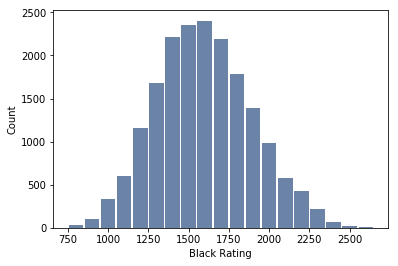

In [11]:
hist = thinkstats2.Hist(games.black_rating.round(-2))
thinkplot.Hist(hist,width = 90)
thinkplot.Config(xlabel='Black Rating', ylabel='Count')

In [12]:
games.black_rating.mean(), games.black_rating.std(), games.black_rating.mode()

(1594.9183948289792, 296.57202303019665, 0    1400
 dtype: int64)

Now the distribution of ratings appears to be fairly normal with a slight right skew.

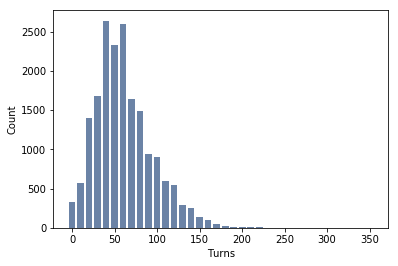

In [13]:
hist = thinkstats2.Hist(games.turns.round(-1))
thinkplot.Hist(hist,width = 8)
thinkplot.Config(xlabel='Turns', ylabel='Count')

In [14]:
games.turns.mean(), games.turns.std(), games.turns.mode()

(61.12932938324805, 33.65600382420226, 0    51
 dtype: int64)

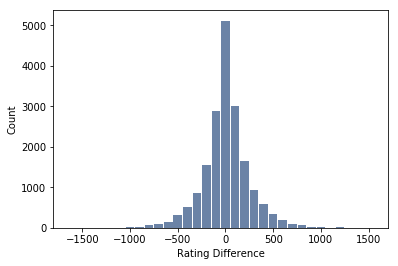

In [15]:
hist = thinkstats2.Hist(games.RatingDifference.round(-2))
thinkplot.Hist(hist,width = 90)
thinkplot.Config(xlabel='Rating Difference', ylabel='Count')

In [16]:
games.RatingDifference.mean(), games.RatingDifference.std(), games.RatingDifference.mode()

(7.529652572044169, 246.28708035438308, 0    0
 dtype: int64)

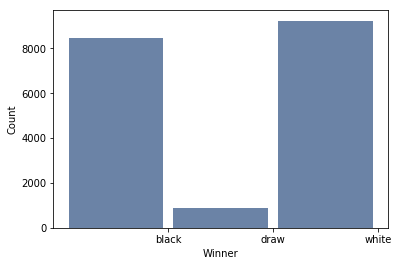

In [17]:
hist = thinkstats2.Hist(games.winner)
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Winner', ylabel='Count')

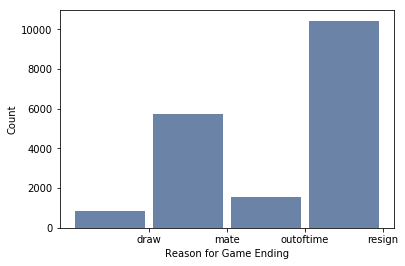

In [18]:
hist = thinkstats2.Hist(games.victory_status)
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Reason for Game Ending', ylabel='Count')

Now I am creating a PMF comparing the number of turns in games white wins vs. the number of turns in games black wins.

In [19]:
WhiteWins = games[games['winner'] == 'white']
BlackWins = games[games['winner'] == 'black']
white_pmf = thinkstats2.Pmf(WhiteWins.turns.round(-1), label='White Wins')
black_pmf = thinkstats2.Pmf(BlackWins.turns.round(-1), label='Black Wins')

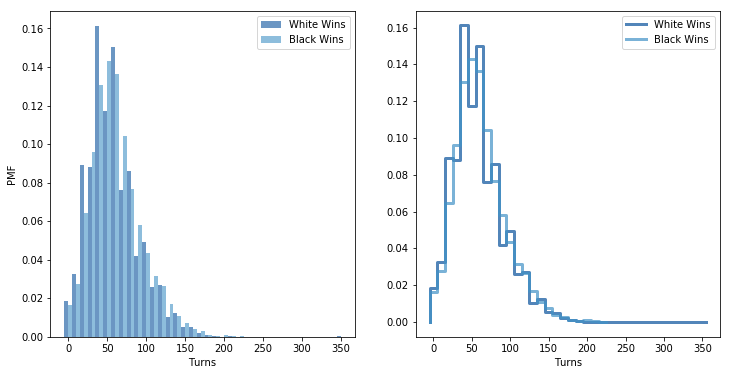

In [20]:
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(white_pmf, align='right', width = 5)
thinkplot.Hist(black_pmf, align='left', width = 5)
thinkplot.Config(xlabel='Turns', ylabel='PMF')

thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([white_pmf, black_pmf])
thinkplot.Config(xlabel='Turns')

Now I will create a CDF based on the number of turns in a game.

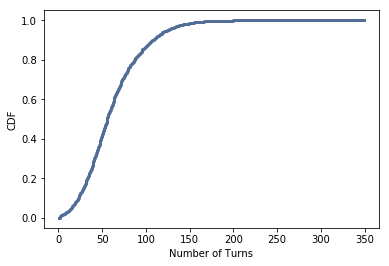

In [21]:
cdf = thinkstats2.Cdf(games.turns)
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Number of Turns', ylabel='CDF')

In [22]:
cdf.Prob(50)

0.4233773229194721

In [23]:
cdf.Prob(100)

0.8694855911661729

In [24]:
cdf.Prob(150)

0.9850794505790466

Below is the code for a Normal Probability Plot

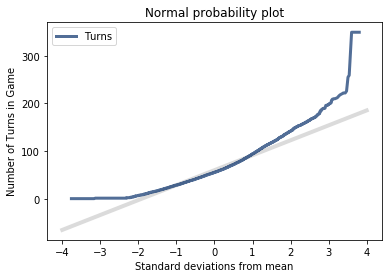

In [25]:
mean, var = thinkstats2.TrimmedMeanVar(games.turns, p=0.01)
std = np.sqrt(var)

xs = [-4, 4]
fxs, fys = thinkstats2.FitLine(xs, mean, std)
thinkplot.Plot(fxs, fys, linewidth=4, color='0.8')

xs, ys = thinkstats2.NormalProbability(games.turns)
thinkplot.Plot(xs, ys, label='Turns')

thinkplot.Config(title='Normal probability plot',
                 xlabel='Standard deviations from mean',
                 ylabel='Number of Turns in Game')

Scatter Plot 1: White Rating vs. Black Rating

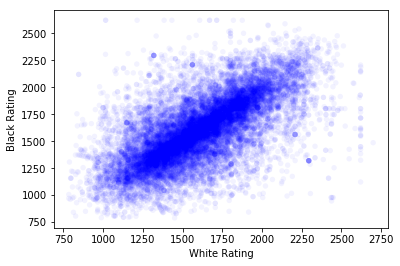

In [27]:
thinkplot.Scatter(games.white_rating, games.black_rating, alpha=0.05)
thinkplot.Config(xlabel='White Rating',
                 ylabel='Black Rating',
                 legend=False)

In [37]:
def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov

def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)

    corr = Cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return corr

In [38]:
Corr(games.white_rating, games.black_rating)

0.6551902762522993

Scatter Plot 2: Rating Difference vs. Number of Turns

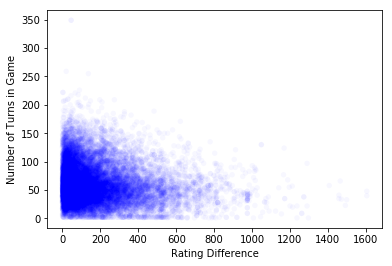

In [33]:
games.RatingDifferenceAbs = np.absolute(games.RatingDifference)
thinkplot.Scatter(games.RatingDifferenceAbs, games.turns, alpha=0.03)
thinkplot.Config(xlabel='Rating Difference',
                 ylabel='Number of Turns in Game',
                 legend=False)

In [41]:
Corr(games.RatingDifferenceAbs, games.turns)

-0.1313176474069874

Conduct a test on the hypothesis that there is a correlation between Difference in Rating and Turns

In [43]:
class CorrelationPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        xs, ys = data
        test_stat = abs(thinkstats2.Corr(xs, ys))
        return test_stat

    def RunModel(self):
        xs, ys = self.data
        xs = np.random.permutation(xs)
        return xs, ys

In [45]:
data = games.RatingDifferenceAbs, games.turns
ht = CorrelationPermute(data)
pvalue = ht.PValue()
pvalue

0.0

In [46]:
ht.actual, ht.MaxTestStat()

(0.1313176474069874, 0.02857896820151627)

Below I will conduct regression analysis on Rating Difference vs. Turns

In [51]:
from thinkstats2 import Mean, MeanVar, Var, Std, Cov

def LeastSquares(xs, ys):
    meanx, varx = MeanVar(xs)
    meany = Mean(ys)

    slope = Cov(xs, ys, meanx, meany) / varx
    inter = meany - slope * meanx

    return inter, slope

inter, slope = LeastSquares(games.RatingDifferenceAbs, games.turns)

In [52]:
def FitLine(xs, inter, slope):
    fit_xs = np.sort(xs)
    fit_ys = inter + slope * fit_xs
    return fit_xs, fit_ys

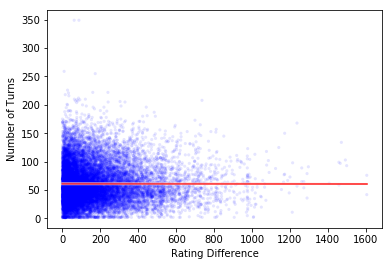

In [54]:
fit_xs, fit_ys = FitLine(games.RatingDifferenceAbs, inter, slope)

thinkplot.Scatter(games.RatingDifferenceAbs, games.turns, color='blue', alpha=0.1, s=10)
thinkplot.Plot(fit_xs, fit_ys, color='white', linewidth=3)
thinkplot.Plot(fit_xs, fit_ys, color='red', linewidth=2)
thinkplot.Config(xlabel="Rating Difference",
                 ylabel='Number of Turns',
                 legend=False)

In [55]:
inter, slope

(61.18000125772602, -0.00029682088948881143)

In [58]:
def Residuals(xs, ys, inter, slope):
    xs = np.asarray(xs)
    ys = np.asarray(ys)
    res = ys - (inter + slope * xs)
    return res

def CoefDetermination(ys, res):
    return 1 - Var(res) / Var(ys)

inter, slope = LeastSquares(games.RatingDifferenceAbs, games.turns)
res = Residuals(games.RatingDifferenceAbs, games.turns, inter, slope)
r2 = CoefDetermination(games.turns, res)
r2

2.4553927890913485e-06